# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: David Wang
### Student ID: 012368967
### Email address: davidwangdn@gmail.com


##  <u>References and sources </u>

SVM.Breast.ipynb
SciKit API

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
# Load data from CSV
df=pd.read_csv('homework4_input_data.csv', sep=',',header=0)
X = df[df.columns[1:3001]]
Y = df['Class']
df.head()

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [4]:
df.describe()

,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,ITGA3,...,SULT1B1,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL
count,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,...,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000
mean,6.493217,0.875979,2.547433,2.024070,2.788808,2.838891,2.413940,5.273215,4.531003,6.358596,...,1.347919,4.490551,1.933813,1.628066,2.083775,1.000454,7.176974,6.762318,1.764221,3.516539
std,1.341540,1.322937,1.712000,1.442751,1.385994,1.147753,1.535475,1.570749,1.198838,1.524787,...,1.342945,1.281910,1.314929,1.694187,1.368720,1.282440,1.285927,3.121063,1.190842,1.496502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.197540,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.807468,0.000000,0.000000,0.000000
25%,5.697111,0.000000,1.105780,0.999840,1.810114,2.055747,1.497904,4.215464,3.813267,5.600968,...,0.350634,3.745679,1.122227,0.288757,1.079199,0.000000,6.466050,5.784987,0.875012,2.394757
50%,6.588478,0.279846,2.391468,1.710090,2.679240,2.630627,2.061542,5.211668,4.398703,6.357384,...,0.897331,4.490178,1.567558,0.999664,1.784131,0.428042,7.346725,7.762936,1.421289,3.475282
75%,7.415357,1.159160,3.819411,2.976235,3.748897,3.439166,2.858414,6.405440,5.331706,7.364287,...,2.088001,5.119473,2.091528,2.583887,2.742996,1.499093,8.090525,8.925813,2.575496,4.371683
max,10.753816,6.531445,8.714974,7.458509,7.685174,7.041480,10.548175,10.840692,8.464498,10.031628,...,7.199111,9.034211,7.237835,7.120254,6.901291,5.933580,11.307692,14.115754,6.007571,8.039268


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

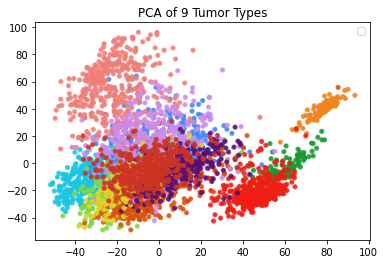

<Figure size 432x288 with 0 Axes>

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)

colors = {"Breast":'#4287f5', "Bladder" :'#19c5e3', "Colon":'#80d941', "Glioblastoma":'#179933',
          "Head&Neck":'#f07e78', "Kidney":'#f01e13', "Leukemia":'#f0841f', "LungAdeno":'#db5209',
         "LungSquamous":'#ce8ced', "Ovarian":'#551075', "Rectal":'#e3d329', "Uterine":'#cc3423'}

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], color=[colors[x] for x in Y], alpha=.8, lw=2, s=10)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of 9 Tumor Types')
plt.figure()

In [6]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468,), (868, 3000), (868,))

In [8]:
model = LinearSVC(multi_class='ovr', class_weight='balanced')

score = cross_val_score(model, X_train, Y_train, cv=5, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  33.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.7s remaining:    0.0s


[CV] ................................................. , total=  33.2s
[CV]  ................................................................
[CV] ................................................. , total=  34.7s
[CV]  ................................................................
[CV] ................................................. , total=  35.7s
[CV]  ................................................................
[CV] ................................................. , total=  34.1s
[0.95821326 0.96685879 0.96253602 0.96536797 0.96681097]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


In [17]:
print("Individual cross validation accuracies:", score)
print("Mean cross validation accuracy", score.mean())

Individual cross validation accuracies: [0.95821326 0.96685879 0.96253602 0.96536797 0.96681097]
Mean cross validation accuracy 0.9639574002686395


In [18]:
model.fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.98


Confusion matrix, without normalization
[[ 66   0   0   0   0   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0   0   0   0   0]
 [  0   0  69   0   0   0   0   0   0   0   5   0]
 [  0   0   0  21   0   0   0   0   0   0   0   2]
 [  0   0   0   0  83   0   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   0   0  83   2   0   0   0]
 [  0   0   0   0   0   0   2   2  74   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68   0   0]
 [  0   0   8   0   0   0   0   0   0   0  18   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.93 0.   0.   0.   0.   0.   0.   0.   0.07 0.  ]
 [0.   0.   0.   0.91 0.   0.   0.   0.   0.   0.   0.   0.09]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.

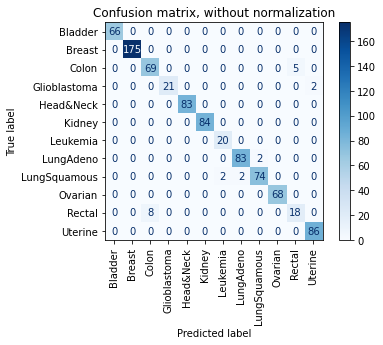

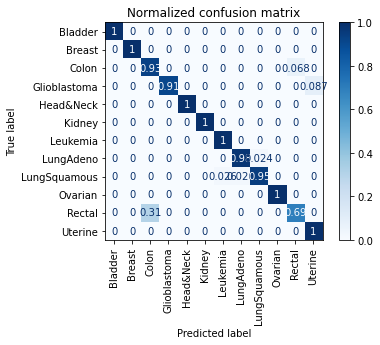

In [19]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                xticks_rotation='vertical')
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()